<a href="https://colab.research.google.com/github/IsaacAraoz/heart-failure-project/blob/main/heart_failure_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 810.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import files

In [ ]:
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [ ]:
uploaded = files.upload()
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = pd.DataFrame(data)

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
from ISLP import confusion_table

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Removing outliers from the data before running analysis**

data cleaning:


some of the predictors seem to be correlated with survivorship, but didn't have a low enough p value to be considered a relevant predictor. Let's get rid of the outliers in each predictor (except for boolean predictors) and run logistic regression again to get a better p value for those predictors.

In [ ]:
def remove_outliers(df,column):
  filtered_pred = pd.DataFrame()
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  filtered_pred = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return filtered_pred

In [ ]:
death = df['DEATH_EVENT'] #boolean
age = remove_outliers(df,'age') #integer
anaemia = df['anaemia'] #boolean
creatinine_phosphokinase = remove_outliers(df,'creatinine_phosphokinase') #integer
diabetes = df['diabetes'] #boolean
ejection_fraction = remove_outliers(df,'ejection_fraction') #integer
high_blood_pressure = df['high_blood_pressure'] #boolean
platelets = remove_outliers(df,'platelets') #continuous
serum_creatinine = remove_outliers(df,'serum_creatinine') #continuous
serum_sodium = remove_outliers(df,'serum_sodium') #integer
sex = df['sex'] #boolean
smoking = df['smoking'] # boolean
time = df['time'] #integer
cleaned_df = pd.DataFrame({'DEATH_EVENT':death,'age':age,'anaemia':anaemia,'creatinine_phosphokinase':creatinine_phosphokinase,'diabetes':diabetes,'ejection_fraction':ejection_fraction,'high_blood_pressure':high_blood_pressure,'platelets':platelets,'serum_creatinine':serum_creatinine,'serum_sodium':serum_sodium,'sex':sex,'smoking':smoking,'time':time})

In [ ]:
matrix = df.corr(numeric_only = True).round(2)
matrix.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.090000,-0.080000,-0.100000,0.060000,0.090000,-0.050000,0.160000,-0.050000,0.070000,0.020000,-0.220000,0.250000
anaemia,0.090000,1.000000,-0.190000,-0.010000,0.030000,0.040000,-0.040000,0.050000,0.040000,-0.090000,-0.110000,-0.140000,0.070000
creatinine_phosphokinase,-0.080000,-0.190000,1.000000,-0.010000,-0.040000,-0.070000,0.020000,-0.020000,0.060000,0.080000,0.000000,-0.010000,0.060000
diabetes,-0.100000,-0.010000,-0.010000,1.000000,-0.000000,-0.010000,0.090000,-0.050000,-0.090000,-0.160000,-0.150000,0.030000,-0.000000
ejection_fraction,0.060000,0.030000,-0.040000,-0.000000,1.000000,0.020000,0.070000,-0.010000,0.180000,-0.150000,-0.070000,0.040000,-0.270000
high_blood_pressure,0.090000,0.040000,-0.070000,-0.010000,0.020000,1.000000,0.050000,-0.000000,0.040000,-0.100000,-0.060000,-0.200000,0.080000
platelets,-0.050000,-0.040000,0.020000,0.090000,0.070000,0.050000,1.000000,-0.040000,0.060000,-0.130000,0.030000,0.010000,-0.050000
serum_creatinine,0.160000,0.050000,-0.020000,-0.050000,-0.010000,-0.000000,-0.040000,1.000000,-0.190000,0.010000,-0.030000,-0.150000,0.290000
serum_sodium,-0.050000,0.040000,0.060000,-0.090000,0.180000,0.040000,0.060000,-0.190000,1.000000,-0.030000,0.000000,0.090000,-0.200000
sex,0.070000,-0.090000,0.080000,-0.160000,-0.150000,-0.100000,-0.130000,0.010000,-0.030000,1.000000,0.450000,-0.020000,-0.000000


**visual demonstration of the distribution of each predictor**

Text(0.5, 1.0, 'time')

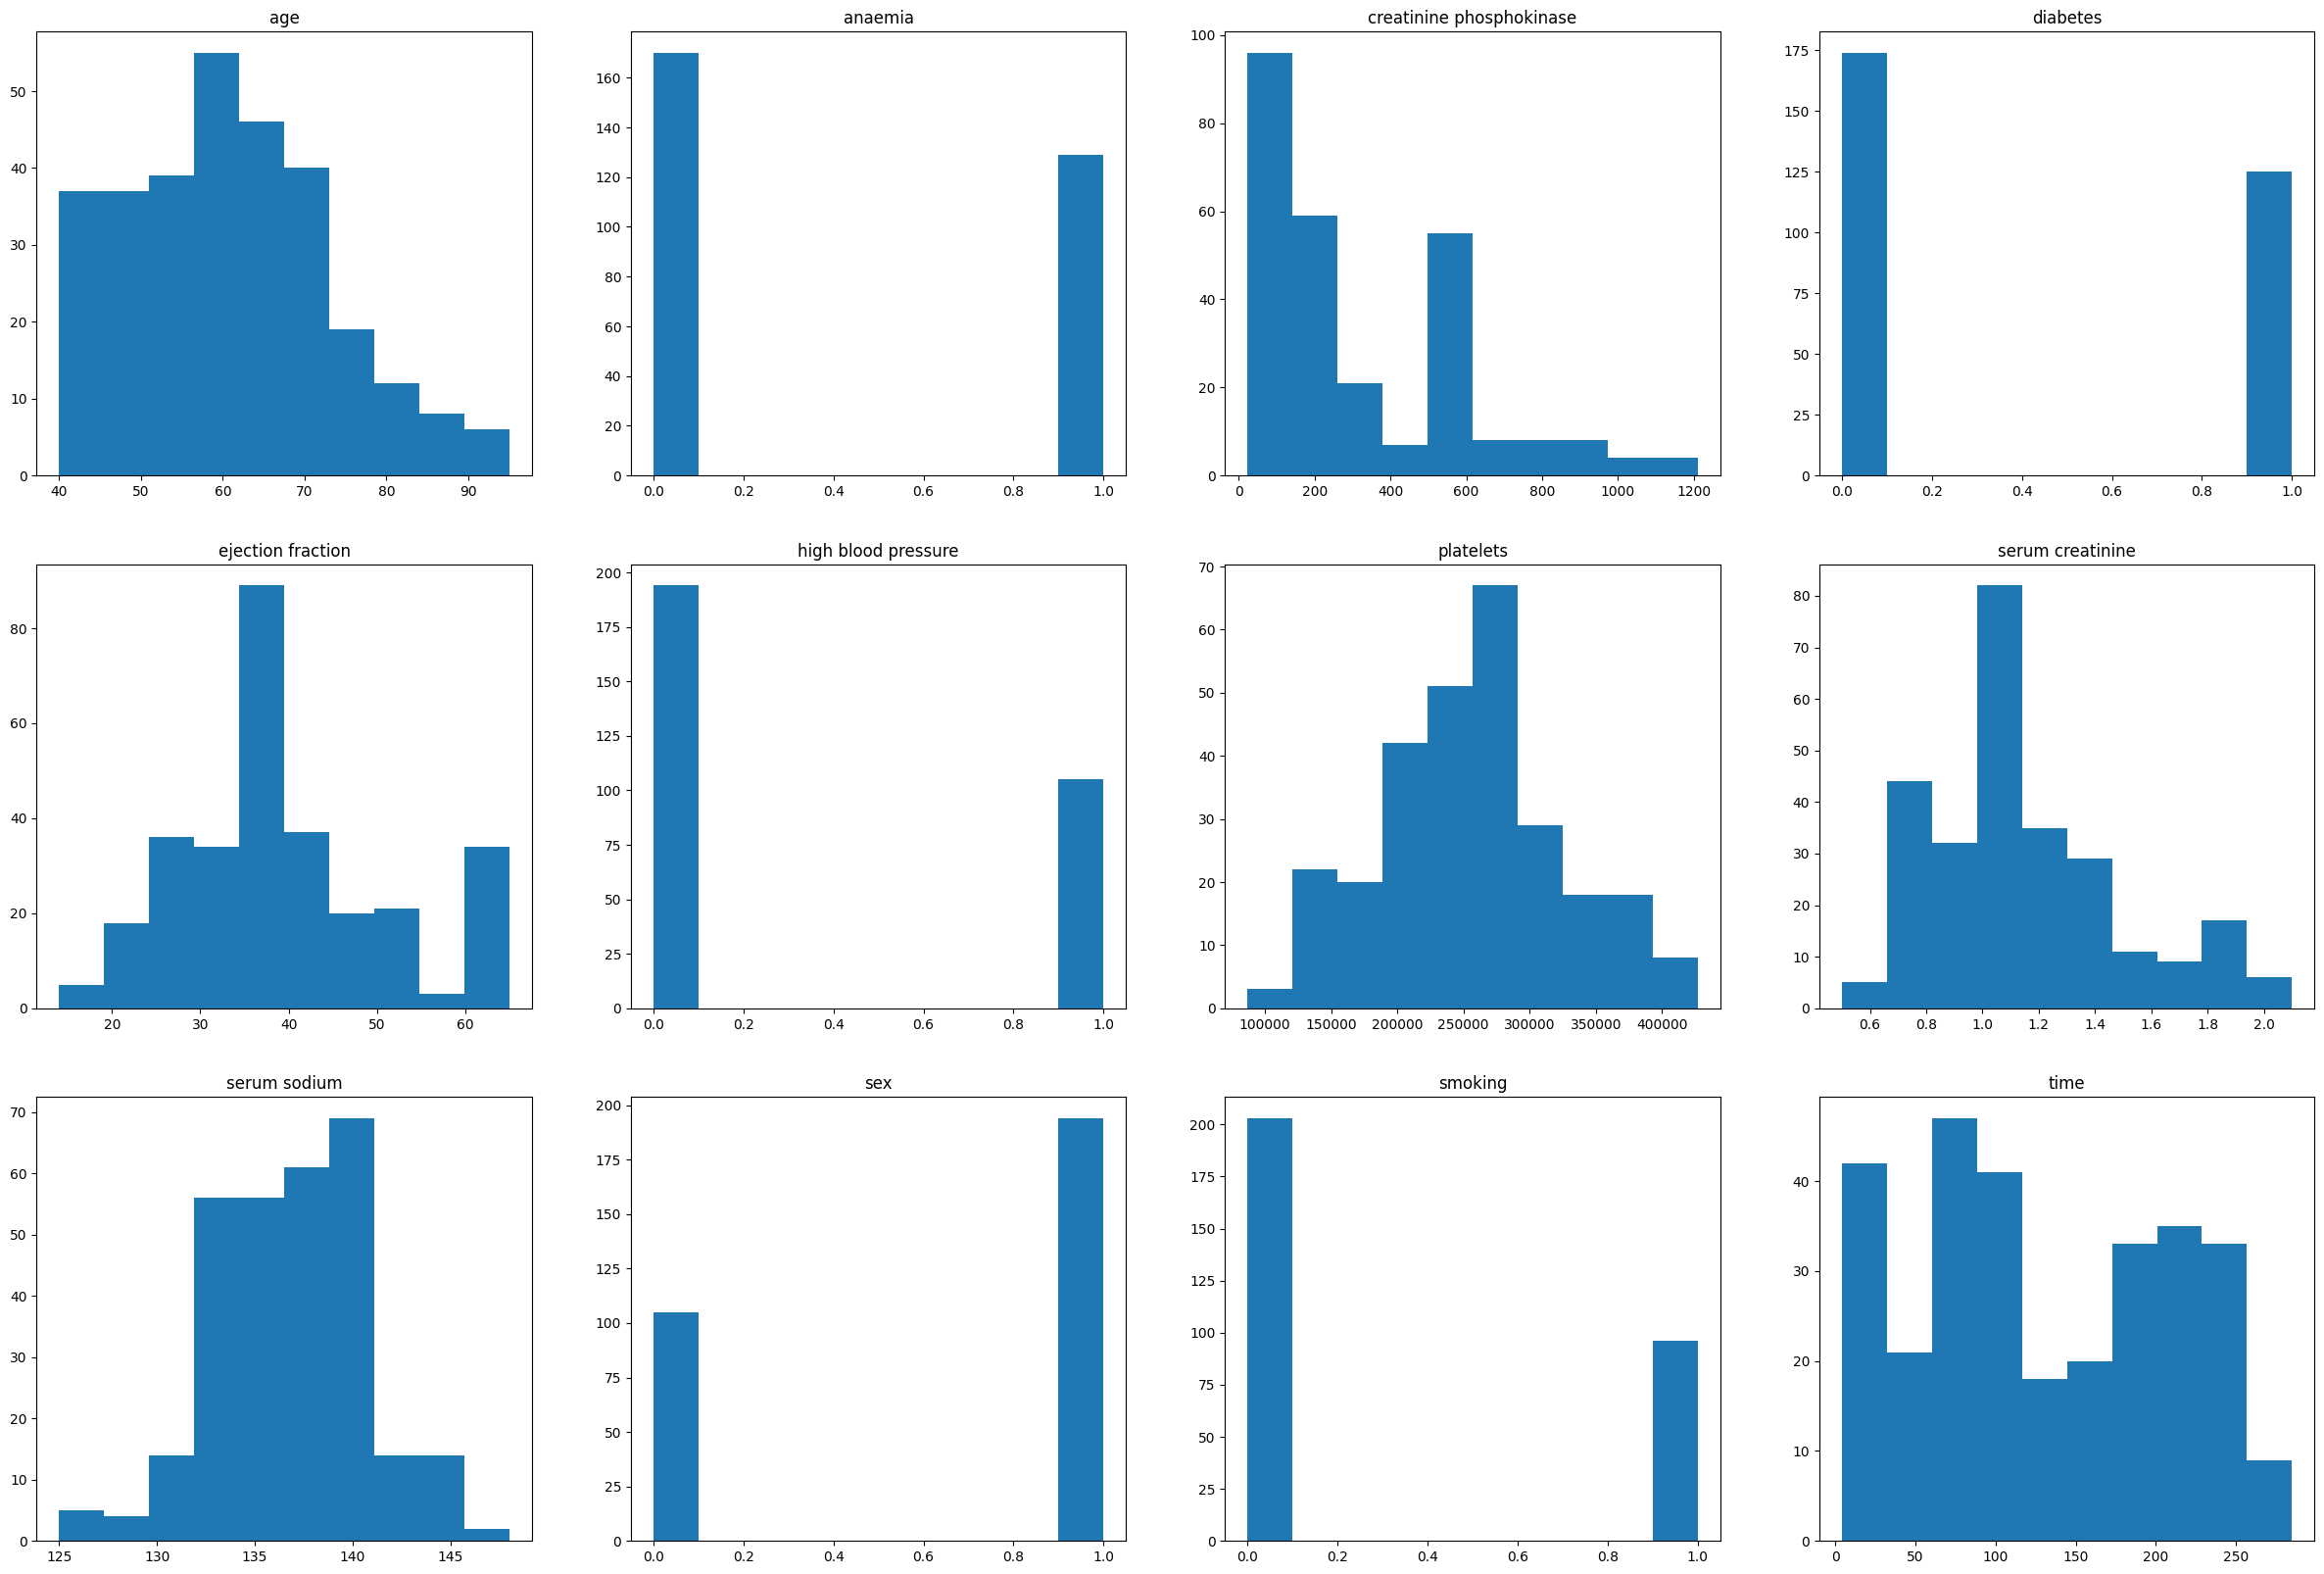

In [ ]:
fig,ax = plt.subplots(3,4,figsize = (30,20))
ax[0,0].hist(age)
ax[0,1].hist(anaemia)
ax[0,2].hist(creatinine_phosphokinase)
ax[0,3].hist(diabetes)
ax[1,0].hist(ejection_fraction)
ax[1,1].hist(high_blood_pressure)
ax[1,2].hist(platelets)
ax[1,3].hist(serum_creatinine)
ax[2,0].hist(serum_sodium)
ax[2,1].hist(sex)
ax[2,2].hist(smoking)
ax[2,3].hist(time)
ax[0,0].set_title('age')
ax[0,1].set_title('anaemia')
ax[0,2].set_title('creatinine phosphokinase')
ax[0,3].set_title('diabetes')
ax[1,0].set_title('ejection fraction')
ax[1,1].set_title('high blood pressure')
ax[1,2].set_title('platelets')
ax[1,3].set_title('serum creatinine')
ax[2,0].set_title('serum sodium')
ax[2,1].set_title('sex')
ax[2,2].set_title('smoking')
ax[2,3].set_title('time')

<Axes: title={'center': 'death vs survived'}, xlabel='death and survived', ylabel='count'>

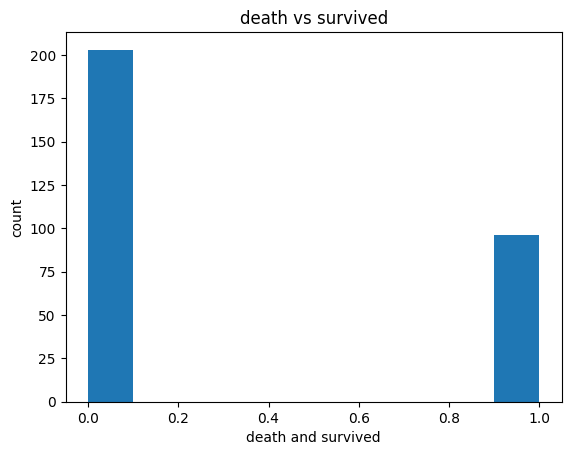

In [ ]:
death.plot(kind = 'hist',xlabel= 'death and survived',ylabel = 'count',title='death vs survived')

In [ ]:
predictors = MS(cleaned_df.columns.drop('DEATH_EVENT','time'))
design = predictors.fit_transform(df)
model = sm.GLM(death, design, family=sm.families.Binomial())
results = model.fit()
results.pvalues

,0
intercept,7.177408e-02
age,2.690176e-03
anaemia,9.834665e-01
creatinine_phosphokinase,2.116841e-01
diabetes,6.793795e-01
ejection_fraction,2.668274e-06
high_blood_pressure,7.746875e-01
platelets,5.254039e-01
serum_creatinine,2.424690e-04
serum_sodium,9.185545e-02


In [ ]:
probs = results.predict()
np.mean(probs)

np.float64(0.32107023411365104)

In [ ]:
np.median(probs)

np.float64(0.1919585843896126)

In [ ]:
np.std(probs)

np.float64(0.31901403656397687)

In [ ]:
pred_die = probs > 0.5
confusion = confusion_table(death, pred_die)
confusion

Truth,False,True
Predicted,,
False,187,16
True,27,69


sensitivity: 71.875 %

specificity: 92.118 %

Error rate: 14.381 %

Test accuracy: 85.619 %


predictors with p value < 0.05:

**age**

**ejection fracton**

**serum_creatinine**


Let's make a new logistic regression model with just these relevant predictors

In [ ]:
rel_preds = MS(cleaned_df[['age', 'ejection_fraction', 'serum_creatinine']])
design = rel_preds.fit_transform(df)
model2 = sm.GLM(death, design, family=sm.families.Binomial())
results2 = model2.fit()
summarize(results2)

,coef,std err,z,P>|z|
intercept,-2.3531,0.840,-2.803,0.005
age,0.0517,0.012,4.202,0.000
ejection_fraction,-0.0700,0.014,-4.918,0.000
serum_creatinine,0.6659,0.159,4.184,0.000


In [ ]:
cleaned_df = cleaned_df.dropna()
cleaned_df

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.0,0,582.0,0,20.0,1,265000.0,1.9,130.0,1,0,4
2,1,65.0,0,146.0,0,20.0,0,162000.0,1.3,129.0,1,1,7
3,1,50.0,1,111.0,0,20.0,0,210000.0,1.9,137.0,1,0,7
5,1,90.0,1,47.0,0,40.0,1,204000.0,2.1,132.0,1,1,8
6,1,75.0,1,246.0,0,15.0,0,127000.0,1.2,137.0,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,60.0,0,320.0,0,35.0,0,133000.0,1.4,139.0,1,0,258
292,0,52.0,0,190.0,1,38.0,0,382000.0,1.0,140.0,1,1,258
293,0,63.0,1,103.0,1,35.0,0,179000.0,0.9,136.0,1,1,270
294,0,62.0,0,61.0,1,38.0,1,155000.0,1.1,143.0,1,1,270


using the validation set to test the model on real test data

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cleaned_df, test_size=0.5, random_state=42)
rel_preds = MS(train[['age','ejection_fraction','serum_creatinine']])
design_train = rel_preds.fit_transform(train)
model_train = sm.GLM(train['DEATH_EVENT'], design_train, family=sm.families.Binomial())
results_train = model_train.fit()
design_test = rel_preds.fit_transform(test)
results_test = results_train.predict(design_test)
pred_die = results_test > 0.5
confusion = confusion_table(test['DEATH_EVENT'], pred_die)
confusion

Truth,False,True
Predicted,,
False,78,5
True,16,13


sensitivity: 44.828 %

specificity: 93.976 %

Error rate: 23.077 %

Test accuracy: 76.923 %

In [ ]:
train, test = train_test_split(cleaned_df, test_size=0.5, random_state=42)
predictors = MS(cleaned_df.columns.drop('DEATH_EVENT','time'))
design_train = predictors.fit_transform(train)
model_train = sm.GLM(train['DEATH_EVENT'], design_train, family=sm.families.Binomial())
results_train = model_train.fit()
design_test = predictors.fit_transform(test)
results_test = results_train.predict(design_test)
pred_die = results_test > 0.5
confusion = confusion_table(test['DEATH_EVENT'], pred_die)
confusion

Truth,False,True
Predicted,,
False,77,6
True,13,16


In [ ]:
probs2 = results2.predict()
np.mean(probs2)

np.float64(0.32107023411371116)

In [ ]:
np.median(probs2)

np.float64(0.2576587751690781)

In [ ]:
np.std(probs2)

np.float64(0.2204868873642944)

In [ ]:
 pred_die = (probs2 > 0.5)
confusion = confusion_table(death, pred_die)
confusion

Truth,False,True
Predicted,,
False,183,20
True,49,47


sensitivity: 48.958%

specificity: 90.148

Error rate: 23.077%

Test accuracy: 76.923 %


ideas for later models:

we should use K fold cross validation on both logistic regression models, the one with only relevant predictors and the one with all of the predictors. The model with all the predictors yields a higher "test accuracy' possibly because it is overfit to the data. By using cross validation we can confirm which model is actually better. It might be a good idea to plot the distribution of each predictor in each class of death event, i.e. those who died and those who didn't die, and check if the distribution is normal. If so we should use LDA to make a new model on the data, and if not we should use KNN since it is non parametric.

**checking mean, median, and std of predictors of those who died and those who survived:**

In [ ]:
predictors_died = MS(df.columns.drop('DEATH_EVENT','time')).fit_transform(df[death == 1])
predictors_survived = MS(df.columns.drop('DEATH_EVENT','time')).fit_transform(df[death == 0])
md = np.mean(predictors_died,axis=0)
md

,0
intercept,1.000000
age,65.215281
anaemia,0.479167
creatinine_phosphokinase,670.197917
diabetes,0.416667
ejection_fraction,33.468750
high_blood_pressure,0.406250
platelets,256381.044792
serum_creatinine,1.835833
serum_sodium,135.375000


In [ ]:
np.median(predictors_died,axis=0)

array([1.000e+00, 6.500e+01, 0.000e+00, 2.590e+02, 0.000e+00, 3.000e+01,
       0.000e+00, 2.585e+05, 1.300e+00, 1.355e+02, 1.000e+00, 0.000e+00,
       4.450e+01])

In [ ]:
np.std(predictors_died,axis =0)

,0
intercept,0.000000
age,13.145550
anaemia,0.499566
creatinine_phosphokinase,1309.705498
diabetes,0.493007
ejection_fraction,12.459897
high_blood_pressure,0.491132
platelets,98011.184912
serum_creatinine,1.460893
serum_sodium,4.975461


In [ ]:
ms = np.mean(predictors_survived,axis=0)
ms

,0
intercept,1.000000
age,58.761906
anaemia,0.408867
creatinine_phosphokinase,540.054187
diabetes,0.418719
ejection_fraction,40.266010
high_blood_pressure,0.325123
platelets,266657.489901
serum_creatinine,1.184877
serum_sodium,137.216749


In [ ]:
np.median(predictors_survived,axis=0)

array([1.00e+00, 6.00e+01, 0.00e+00, 2.45e+02, 0.00e+00, 3.80e+01,
       0.00e+00, 2.63e+05, 1.00e+00, 1.37e+02, 1.00e+00, 0.00e+00,
       1.72e+02])

In [ ]:
np.std(predictors_survived)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)


,0
intercept,0.000000
age,10.611656
anaemia,0.491625
creatinine_phosphokinase,751.940630
diabetes,0.493349
ejection_fraction,10.833181
high_blood_pressure,0.468421
platelets,97290.681073
serum_creatinine,0.652470
serum_sodium,3.973101


**percent difference of each mean survived predictor from the mean dead predictor**

In [ ]:
(ms-md)/md

,0
intercept,0.000000
age,-0.098955
anaemia,-0.146712
creatinine_phosphokinase,-0.194187
diabetes,0.004926
ejection_fraction,0.203093
high_blood_pressure,-0.199697
platelets,0.040083
serum_creatinine,-0.354584
serum_sodium,0.013605
